<a href="https://colab.research.google.com/github/daa103/DAA_ESAA/blob/main/mini_project_4train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 미니 프로젝트 (1)
- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 5개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

  조건: 변수 2개 이상 연결한 결과값 포함

* 위의 주소에서 데이터를 다운받은 후, 사이트의 내용을 참고하여 새로 알고자 하는 내용으로 데이터를 분석하시면 됩니다. 분석은 train.csv 파일만을 이용하시면 됩니다.

* 분석 파일을 github에 업로드 후 링크를 과제함에 댓글로 달아주시면 됩니다.

* 데이터 전처리 및 분석 예시는 카페에 업로드 되어 있으니 참고 바랍니다.

* 제출기한: 2022.04.08 (금) 23:59

# **1. 라이브러리 및 데이터**


In [1]:
# matplotlib 한글 깨짐방지
# 아래코드 실행후 '런타임 다시시작' 후 모듈 불러오기
# 참고 블로그: https://teddylee777.github.io/colab/colab-korean 
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rcParams['font.family'] = 'NanumGothic'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [4]:
# 데이터 불러오기
from google.colab import files
file_uploaded=files.upload()
import io
train=pd.read_csv(io.BytesIO(file_uploaded['movies_train.csv']))
train.head()

Saving movies_train.csv to movies_train (3).csv


,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


# **2. 탐색적 자료분석(EDA)**



## 1) 일부 데이터 미리보기


+ title : 영화의 제목
+ distributor : 배급사
+ genre : 장르
+ release_time : 개봉일
+ time : 상영시간(분)
+ screening_rat : 상영등급
+ director : 감독이름
+ dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ num_staff : 스텝수
+ num_actor : 주연배우수
+ box_off_num : 관객수

In [5]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [6]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


## 2) 데이터 요약


In [7]:
print(train.shape)

(600, 12)


- 600개의 데이터로 학습 시키고 243개의 영화의 관객수를 예측해야 한다. test에는 12개의 열이 있고 test에는 관객수(box_off_num)를 제외한 11개의 열이 존재한다.


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


## 3) 데이터의 요약통계량 확인

In [9]:
pd.options.display.float_format = '{:.1f}'.format

In [10]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


## 4) 결측치 확인 및 데이터 전처리


In [11]:
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

- train과 test 모두 dir_prev_bfnum 변수에 결측값이 존재한다.

In [12]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [13]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0


- train과  test 모두 dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [14]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

- release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. release_time을 datetime형식으로 변환한다.

In [15]:
train['release_time']=pd.to_datetime(train['release_time'])


#**3. 데이터 시각화 및 분석**

##**3-1)영화 관객수**
>### a)영화 관객수와 관련있는 변수 파악하기
> * 새로 만든 columns를 포함한 train: release_year(연도), release_month(월), release_day(일), release_weekday(요일)
* 상관계수를 시각화

In [17]:
# 년도, 월, 일, 요일 별 칼럼 따로 만들기
train['release_year'] = train['release_time'].dt.year # 년도
train['release_month'] = train['release_time'].dt.month # 월
train['release_day'] = train['release_time'].dt.day     # 일
train['release_weekday'] = train['release_time'].dt.weekday # 요일

release_month = train[['release_month','box_off_num']].groupby('release_month').mean().sort_values('box_off_num', ascending = False)
release_month

,box_off_num
release_month,
1,1365930.6
12,1288247.7
7,1113807.2
8,1029161.7
9,731528.6
2,663025.2
5,575685.2
6,512286.5
11,495653.9


In [18]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,release_day,release_weekday
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2012,11,22,3
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015,11,19,3
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,2013,6,5,2
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866,2012,7,12,3
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387,2010,11,4,3


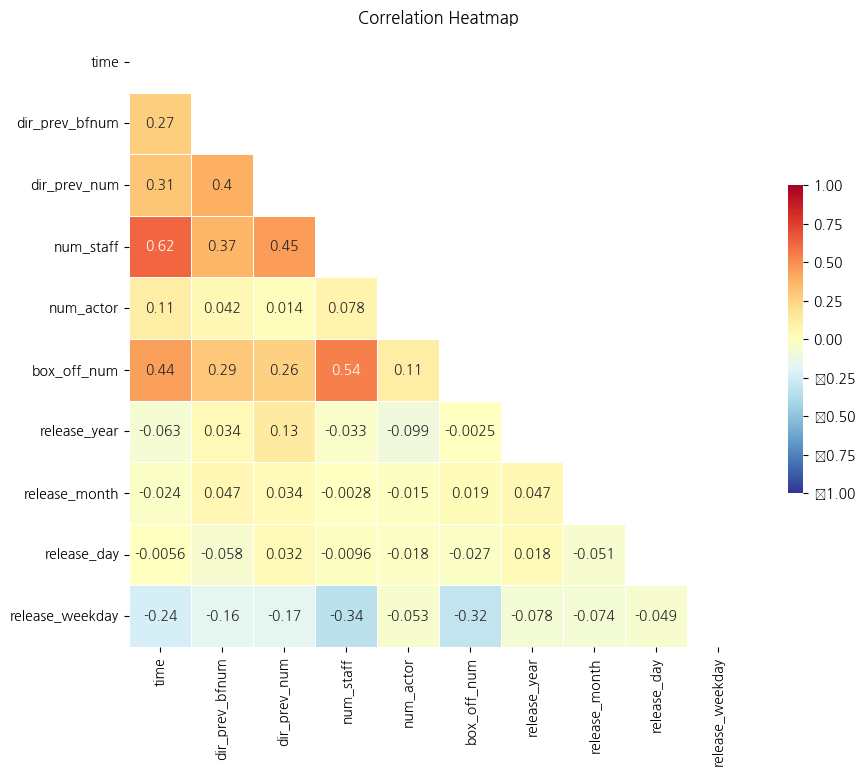

In [19]:
### 상관계수 시각화

corr = train.corr()

# 그림 사이즈 지정
fig, ax = plt.subplots(figsize = (10,8))

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# 하삼각행렬만 시각화(밑에만)
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시
            mask = mask,      # 표시하지 않을 마스크 부분을 지정
            linewidths=.5,  # 경계면을 실선으로 구분하기
            cbar_kws={"shrink": .5}, # 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위: -1 ~ 1(상관계수의 범위)
           )  

plt.title('Correlation Heatmap')
plt.show()

>### b) 계절에 따른 관객수
* 계절별로 관객수의 분포도 파악하기

In [20]:
train['release_month'] = train['release_time'].dt.month

In [21]:
def season(x):
  if ((x>=3) & (x<=5)):
    return 'spring'
  elif ((x>=6) & (x<=8)):
    return 'summer'
  elif ((x>=9) & (x<=11)):
    return 'fall'
  else:
    return 'winter'

train['release_season'] = train['release_month'].apply(season)
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,release_day,release_weekday,release_season
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2012,11,22,3,fall
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015,11,19,3,fall
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,2013,6,5,2,summer
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866,2012,7,12,3,summer
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387,2010,11,4,3,fall


In [22]:
train[['release_season','box_off_num']].groupby('release_season').mean().sort_values('box_off_num', ascending=False)

,box_off_num
release_season,
winter,1150833.7
summer,947644.8
fall,535068.0
spring,379423.3


<Axes: xlabel='release_season', ylabel='box_off_num'>

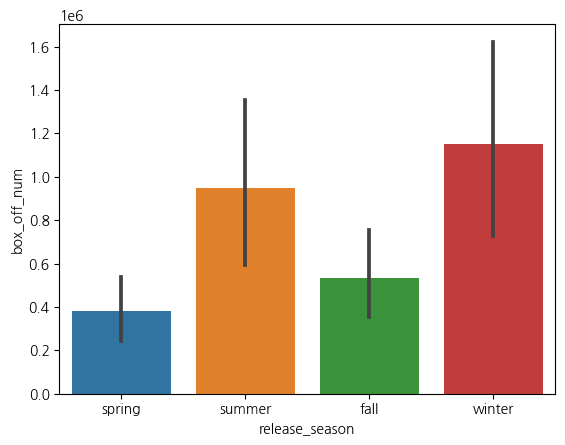

In [23]:
sns.barplot(x='release_season', y='box_off_num', data=train,
                order = ['spring', 'summer','fall','winter'])

**결과**
봄, 가을보다 여름, 겨울에 개방하는 영화의 관객수가 더 많다.

##**3-2)영화 장르별**
>### a) 영화 장르별 총 관객 점유율
> * piechart로 나타내면 점유율을 한 눈에 파악하기 쉽겠다
* 사용되는 데이터: genre, box_off_num/ genere별로 top4 & bottom4
* 데이터 파악: 장르는 categorical, 관객수는 numeric


In [24]:
# 장르별 총 관객 수 구하기
train.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)

genre
드라마       138277444
코미디        63277442
액션         61711274
느와르        61119768
멜로/로맨스     33225507
공포         24814966
SF         23248494
미스터리        8968319
다큐멘터리       6247020
애니메이션       3820460
서스펜스         165222
뮤지컬           33135
Name: box_off_num, dtype: int64

Text(0.5, 1.0, '장르별 관객 점유율')

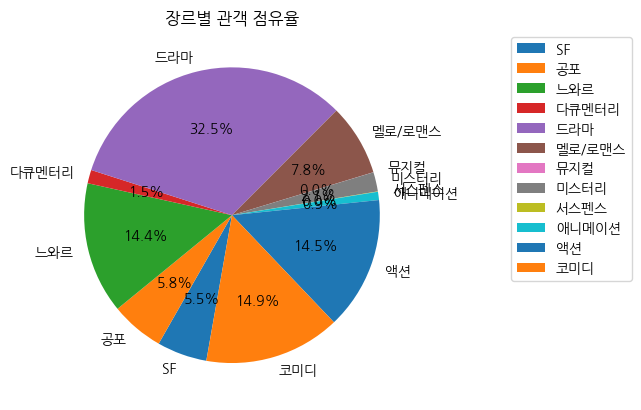

In [25]:
train.groupby(['genre']).sum().plot(kind='pie', y='box_off_num', autopct='%.1f%%', startangle=260, counterclock=False,)
plt.legend(bbox_to_anchor=(1.6,1))
plt.ylabel('')
plt.title('장르별 관객 점유율')
#countercolck=False: 부채꼴 안에 퍼센티지 숫자 표시

> 너무 복잡해서 오히려 분포가 한 눈에 안 들어온다. -> 관객수 Top4와 Bottom4의 pie chart를 각각 시각화하고, 그 비율을 살펴보자.

In [26]:
#Top4 장르
top4=train.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)[:4]
top4   

genre
드라마    138277444
코미디     63277442
액션      61711274
느와르     61119768
Name: box_off_num, dtype: int64

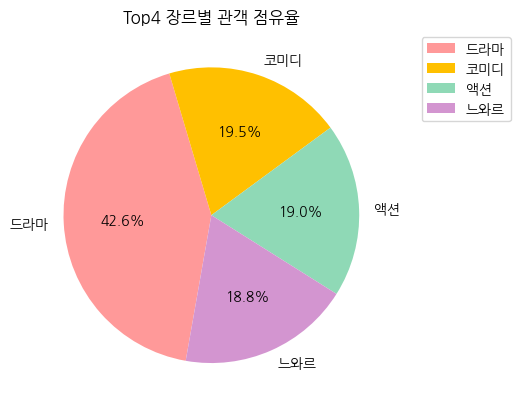

In [27]:
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'] #그래프 색상 지정
top4.plot(kind='pie', y='box_off_num', ylabel='', colors=colors, autopct='%.1f%%', startangle=260, counterclock=False)
plt.title('Top4 장르별 관객 점유율')
plt.legend(bbox_to_anchor=(1.05,1))

**결과**
* Top4의 경우, 드라마가 가장 많은 비율을 차지했고 코미디, 액션, 느와르가 비슷한 비율로 그 뒤를 따른다.

In [29]:
#Bottom4 장르
bottom4=train.groupby('genre')['box_off_num'].sum().sort_values(ascending=False)[-4:]
bottom4

genre
다큐멘터리    6247020
애니메이션    3820460
서스펜스      165222
뮤지컬        33135
Name: box_off_num, dtype: int64

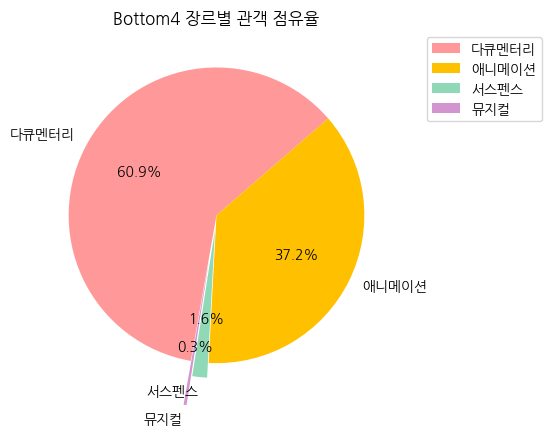

In [30]:
bottom4.plot(kind='pie', y='box_off_num', ylabel='', colors=colors, autopct='%.1f%%', startangle=260, counterclock=False, explode=[0,0,0.1,0.3])
plt.title('Bottom4 장르별 관객 점유율')
plt.legend(bbox_to_anchor=(1.05,1))

**결과**
* 하위 4개 장르 중에서도 서스펜스와 뮤지컬은 아주 작은 비율을 차지한다.

>### b)분기별 많이 개봉하는 장르 (방법1)
* 가설: 1,4분기(연말, 연초)에는 멜로/로맨스&드라마, 2~3 분기에는 공포 영화가 많이 개봉될 것이다
* 사용되는 데이터: release_month를 이용하여 만든 quart, genre
* 데이터 파악: release_month는 numeric, quart와 genre는 categorical
* 계획: 3개월 단위로 분기를 나누어 quart에 집어넣는다. 이후 누적 막대 그래프를 그려 분기별 많이 개봉되는 장르를 알아본다.

In [31]:
#1년을 4분기로 나누어 'quart'라는 column에 집어넣기
train['quart']=''
for i in range(len(train)):
  if train['release_month'][i]>=1 and train['release_month'][i]<=3: 
    train['quart'][i]='1분기'
  elif train['release_month'][i]>=4 and train['release_month'][i]<=6:
    train['quart'][i]='2분기'
  elif train['release_month'][i]>=7 and train['release_month'][i]<=9 : 
    train['quart'][i]='3분기'
  else:
    train['quart'][i]='4분기'

Text(0, 0.5, '장르별 개봉하는 영화 수')

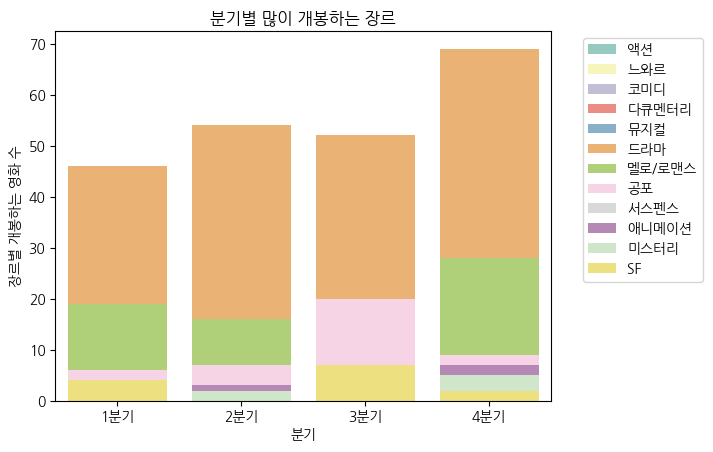

In [32]:
labels=['1분기', '2분기', '3분기', '4분기']
sns.countplot(x='quart', hue='genre', palette='Set3', data=train, dodge=False, order=labels)
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05,1))
plt.title('분기별 많이 개봉하는 장르')
plt.xlabel('분기')
plt.ylabel('장르별 개봉하는 영화 수')

**결과**
* 드라마는 모든 분기에 많이 개봉된다.
예측대로 1분기, 4분기에는 멜로/로맨스 영화가 많이 개봉된다.
* 예측대로 2분기, 3분기에는 공포 영화가 많이 개봉된다.
* SF영화는 3분기에 많이 제작되는 것을 알 수 있다.

>### b)분기별 많이 개봉하는 장르 (방법2)
* top5 장르 barplot그리기

In [33]:
### 계절 구분하기
# 봄: 3월 ~ 5월
# 여름: 6 ~ 8월
# 가을: 9 ~ 11월
# 겨울: 12 ~ 2월

def get_season(x):
  if x == 3 or x == 4 or x == 5:
    return 'spring'
  elif x == 6 or x == 7 or x == 8:
    return 'summer'
  elif x == 9 or x == 10 or x == 11:
    return 'autumn'
  else:
    return 'winter'

In [34]:
train['release_season'] = train['release_month'].apply(get_season)
train.head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,release_day,release_weekday,release_season,quart
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2012,11,22,3,autumn,4분기
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015,11,19,3,autumn,4분기
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,2013,6,5,2,summer,2분기


In [35]:
genre_spring = train.loc[train['release_season'] == 'spring',['title','genre']].groupby('genre').count().sort_values('title',ascending = False)[:5]
genre_spring.columns = ['count']
genre_spring

,count
genre,
드라마,61
다큐멘터리,27
멜로/로맨스,26
코미디,11
느와르,8


In [36]:
genre_spring.index

Index(['드라마', '다큐멘터리', '멜로/로맨스', '코미디', '느와르'], dtype='object', name='genre')

In [37]:
genre_summer = train.loc[train['release_season'] == 'summer',['title','genre']].groupby('genre').count().sort_values('title',ascending = False)[:5]
genre_summer.columns = ['count']
genre_summer

,count
genre,
드라마,36
공포,20
다큐멘터리,19
액션,11
멜로/로맨스,10


In [38]:
genre_autumn = train.loc[train['release_season'] == 'autumn',['title','genre']].groupby('genre').count().sort_values('title',ascending = False)[:5]
genre_autumn.columns = ['count']
genre_autumn

,count
genre,
드라마,74
멜로/로맨스,29
다큐멘터리,27
코미디,17
공포,12


In [39]:
genre_winter = train.loc[train['release_season'] == 'winter',['title','genre']].groupby('genre').count().sort_values('title',ascending = False)[:5]
genre_winter.columns = ['count']
genre_winter

,count
genre,
드라마,50
다큐멘터리,20
코미디,15
멜로/로맨스,13
느와르,8


<BarContainer object of 5 artists>

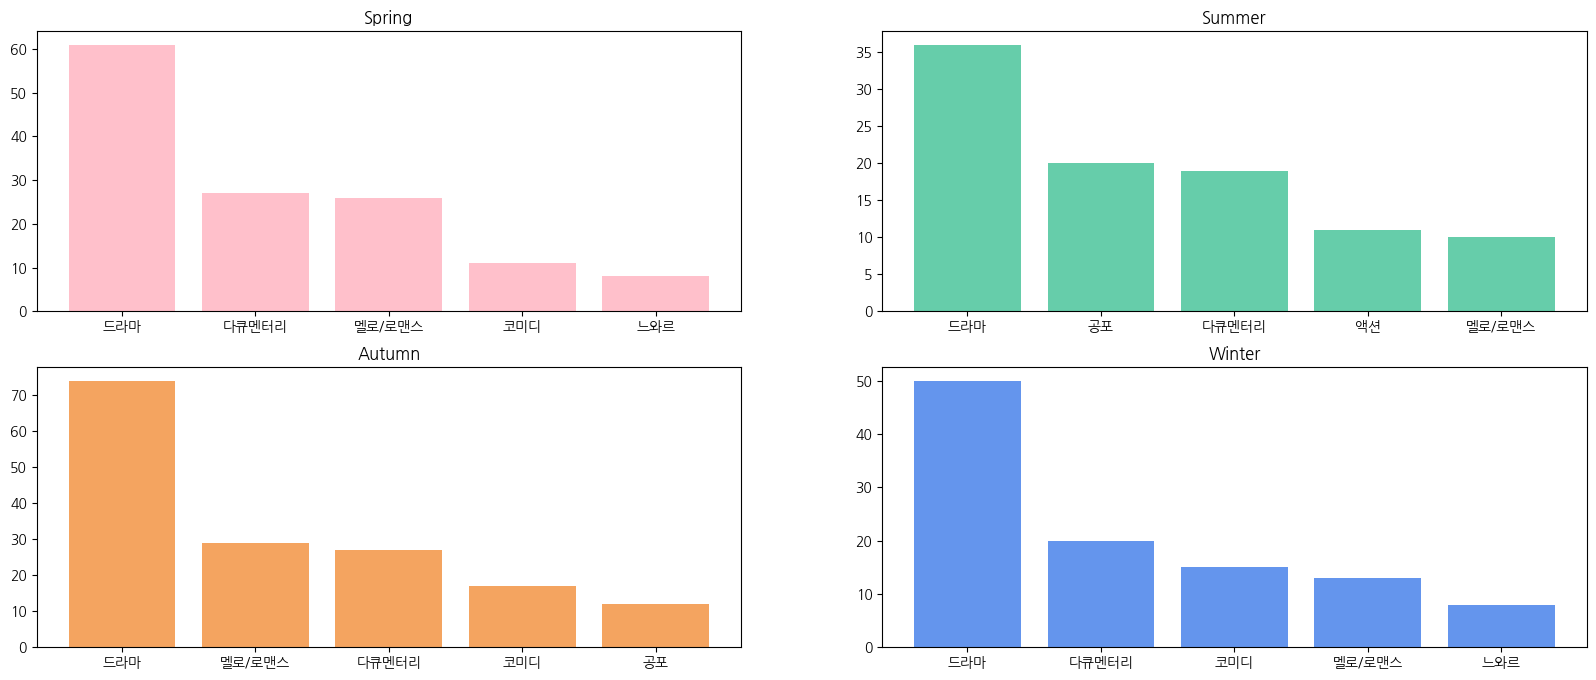

In [40]:
### 계절별로 많이 개봉하는 영화 top5
# figure를 suplots로 분할하여 사계절을 하나의 canvas에!

plt.rcParams['figure.figsize'] = [20, 8]

plt.subplot(2,2,1)
plt.title('Spring')
plt.bar(list(genre_spring.index), genre_spring['count'],color = 'pink')

plt.subplot(2,2,2)
plt.title('Summer')
plt.bar(list(genre_summer.index),genre_summer['count'],color = 'mediumaquamarine')

plt.subplot(2,2,3)
plt.title('Autumn')
plt.bar(list(genre_autumn.index),genre_autumn['count'], color = 'sandybrown')

plt.subplot(2,2,4)
plt.title('Winter')
plt.bar(list(genre_winter.index),genre_winter['count'],color = 'cornflowerblue')

**결과**
* 대체로 전체 개봉작 수(1년 기준)와 계절별 개봉작 수의 순위는 비슷한 경향을 보인다.
* 여름의 경우 공포영화 개봉작 수가 다른 계절에 비해 많다.
* 진짜 여름에 사람들이 공포영화를 많이 봐서 개봉작 수가 많은 것일까?

>### c)공포영화를 가장 많이 보는 달
* 사람들이 여름에 공포영화를 많이 보는지 알아보자.

In [41]:
scary_movies = train.loc[train['genre'] == '공포',['box_off_num','release_month']].groupby('release_month').sum().sort_values('box_off_num',ascending = False)
scary_movies

,box_off_num
release_month,
8,8696468
10,4771054
5,3134965
7,3026010
6,2073412
11,1607097
3,778408
9,709400
4,11650


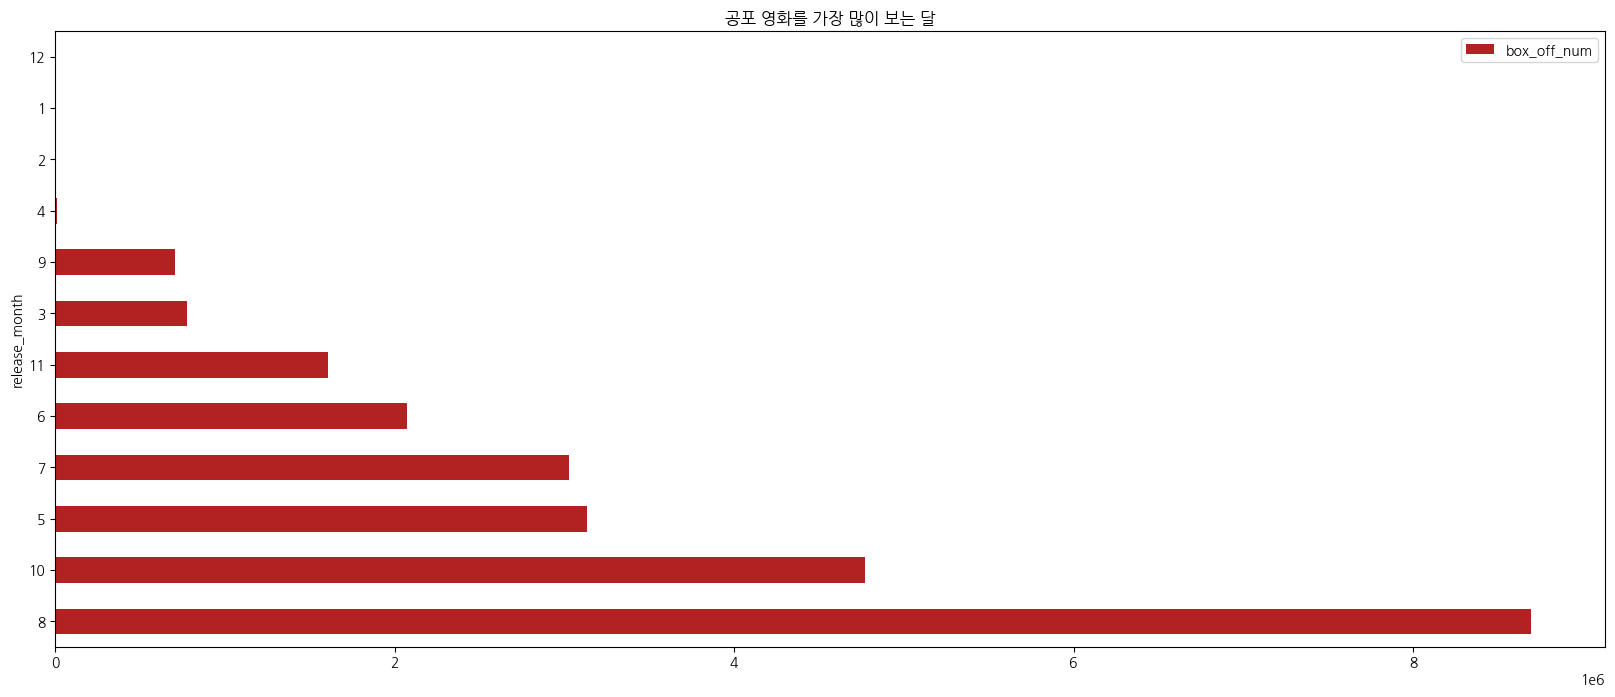

In [42]:
scary_movies.plot(kind = 'barh',color = 'firebrick')
plt.title("공포 영화를 가장 많이 보는 달")
plt.show()

**결과**
* 주로 여름에 해당하는 6~8월에 공포영화가 많이 개봉을 한다.
압도적으로 8월에 공포영화를 보는 사람들이 많다.
* 예상 외로 10월달에도 공포영화를 보는 사람들이 많다.
공포영화를 여름에만 볼 것이라는 편견을 버려..!

>### d) 장르별 스텝수 분석

In [43]:
#스태프수가 누적으로 많은 5개 장르가 무엇인지 알아보기
top5=train.groupby('genre')['num_staff'].sum().sort_values(ascending=False)[:5]
top5

genre
드라마       36351
코미디       11081
멜로/로맨스    10591
액션         9451
느와르        8399
Name: num_staff, dtype: int64

Text(0, 0.5, '스텝수')

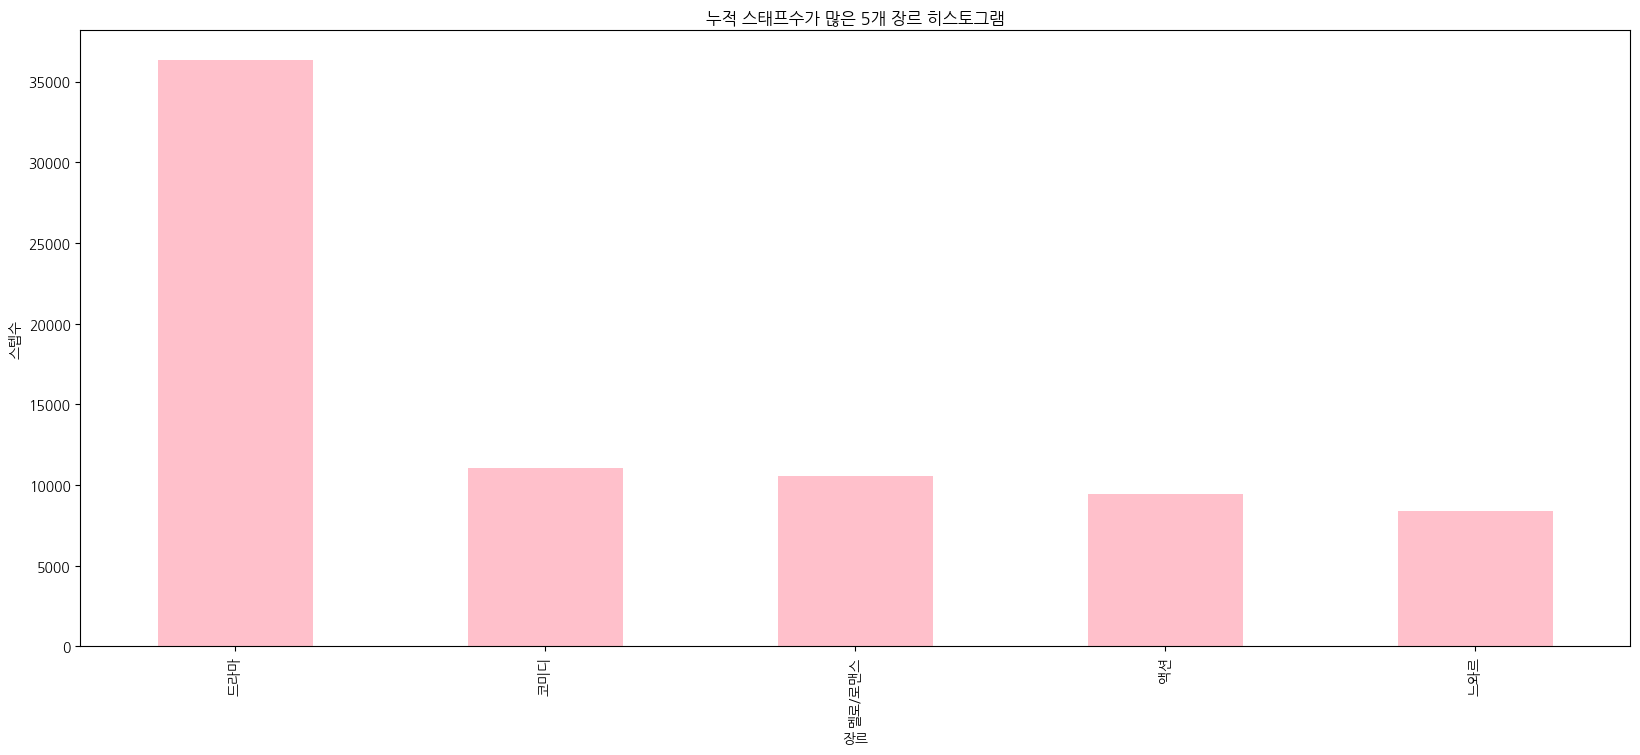

In [44]:
ax=top5.plot(kind='bar',color='pink')
ax.set_title('누적 스태프수가 많은 5개 장르 히스토그램')
ax.set_xlabel('장르')
ax.set_ylabel('스텝수')

In [45]:
#평균 스태프수가 가장많은 5개장르 알아보기
staff5= train[['genre','num_staff']].groupby('genre').mean()[:5]
staff5=staff5.sort_values(by=['num_staff'],ascending=False)
staff5

,num_staff
genre,
느와르,311.1
SF,197.3
공포,176.4
드라마,164.5
다큐멘터리,17.8


Text(0, 0.5, '스텝수')

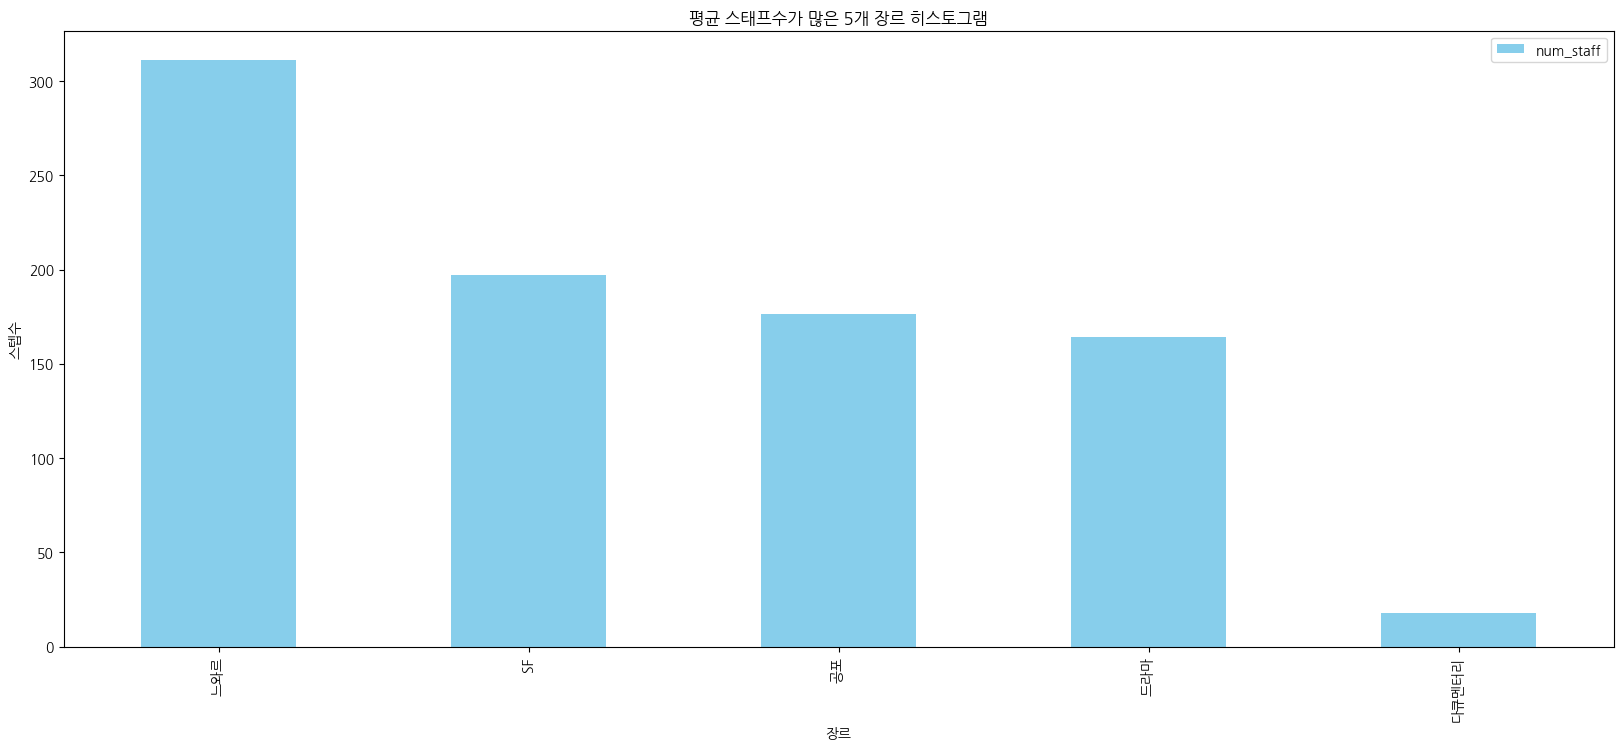

In [46]:
ax=staff5.plot(kind='bar', color='skyblue')
ax.set_title('평균 스태프수가 많은 5개 장르 히스토그램')
ax.set_xlabel('장르')
ax.set_ylabel('스텝수')

**결과**
* 누적 스태프수가 많은 장르가 평균적으로 스태프수가 많은 장르가 아니다.
* 평균적으로 느와르, SF, 공포, 드라마, 다큐멘터리 순서로 스태프수가 많이 필요하다.
* 느와르가 다큐멘터리보다 필요한 스태프수가 2배이상 많다.

>### e) 월별 애니메이션(장르)에 따른 총 관객수

In [47]:
train['release_year'] = train['release_time'].dt.year # 년도
train['release_month'] = train['release_time'].dt.month # 월
train['release_day'] = train['release_time'].dt.day     # 일
train['release_weekday'] = train['release_time'].dt.weekday # 요일

In [48]:
release_month = train[['release_month','box_off_num']].groupby('release_month').mean().sort_values('box_off_num', ascending = False)
release_month

,box_off_num
release_month,
1,1365930.6
12,1288247.7
7,1113807.2
8,1029161.7
9,731528.6
2,663025.2
5,575685.2
6,512286.5
11,495653.9


In [49]:
ani = train.loc[train['genre'] == '애니메이션',['box_off_num','release_month']].groupby('release_month').sum().sort_values('box_off_num',ascending = False)

Text(0.5, 1.0, '월별 애니메이션 관객 수')

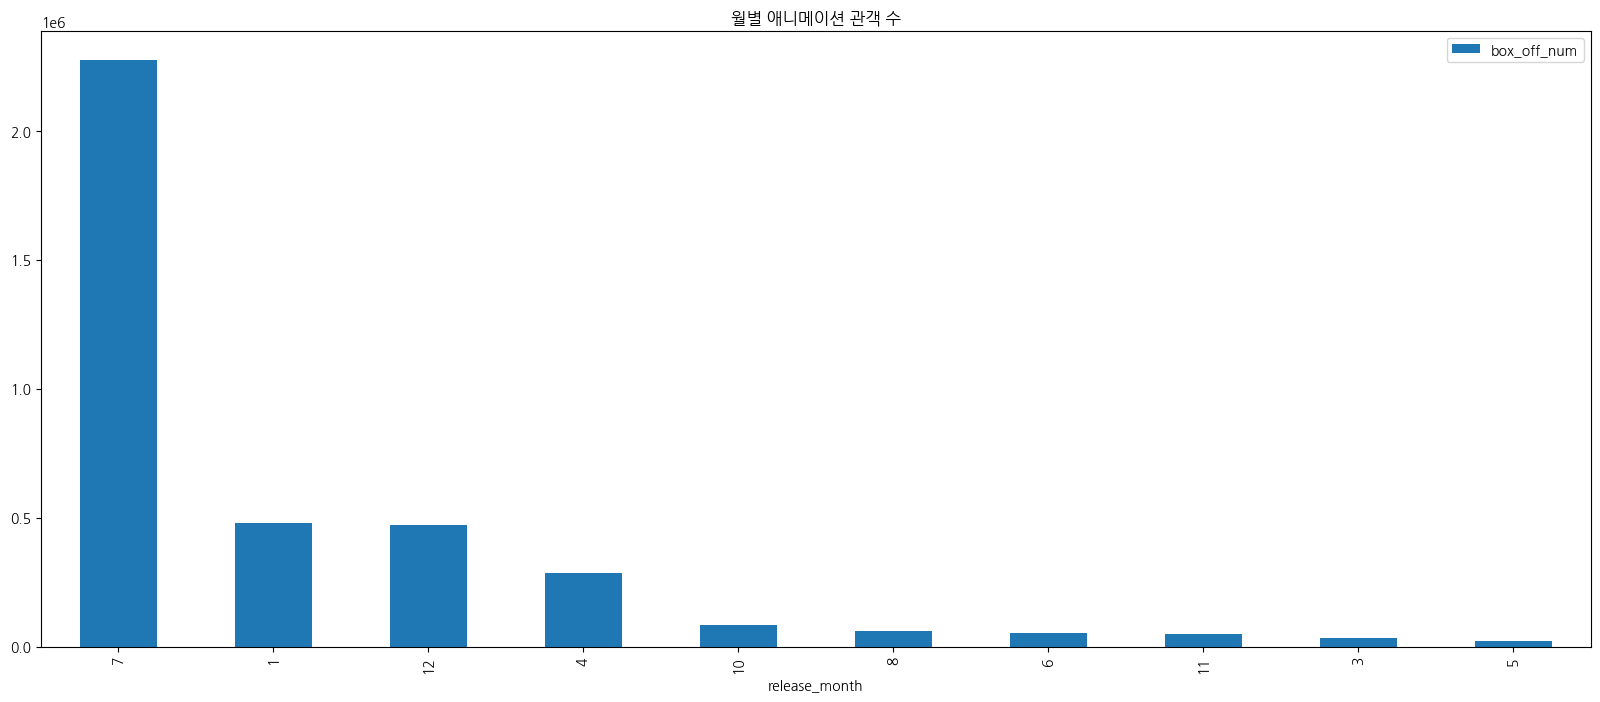

In [50]:
ani.plot(kind="bar")
plt.title("월별 애니메이션 관객 수")

##**3-3)감독의 이전영화 평균 관객수**
>### a) 감독의 이전평균관객수와 현재관객수간 상관관계(그룹화)


In [51]:
train['dir_prev_bfnum'].sort_values(ascending=False)

338   17615314.0
214    8801639.0
16     8223342.0
118    7855474.0
409    7838528.5
         ...    
256          0.0
254          0.0
250          0.0
249          0.0
599          0.0
Name: dir_prev_bfnum, Length: 600, dtype: float64

In [52]:
def topdirector(x):
  if ((x>100000)==True):
    return 'top1'
  elif((x>1000)&(x<=100000)):
    return 'top2'
  elif((x>100)&(x<=1000)):
    return 'top3'
  else:
    return'top4'

In [53]:
train['top_director']=train['dir_prev_bfnum'].apply(topdirector)
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,release_day,release_weekday,release_season,quart,top_director
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2012,11,22,3,autumn,4분기,top4
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015,11,19,3,autumn,4분기,top1
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,2013,6,5,2,summer,2분기,top1
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866,2012,7,12,3,summer,3분기,top2
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387,2010,11,4,3,autumn,4분기,top4


In [54]:
train[['top_director','box_off_num']].groupby('top_director').mean().sort_values('box_off_num')

,box_off_num
top_director,
top3,291262.2
top4,352322.5
top2,474081.8
top1,1538692.5


Text(0, 0.5, '스텝수')

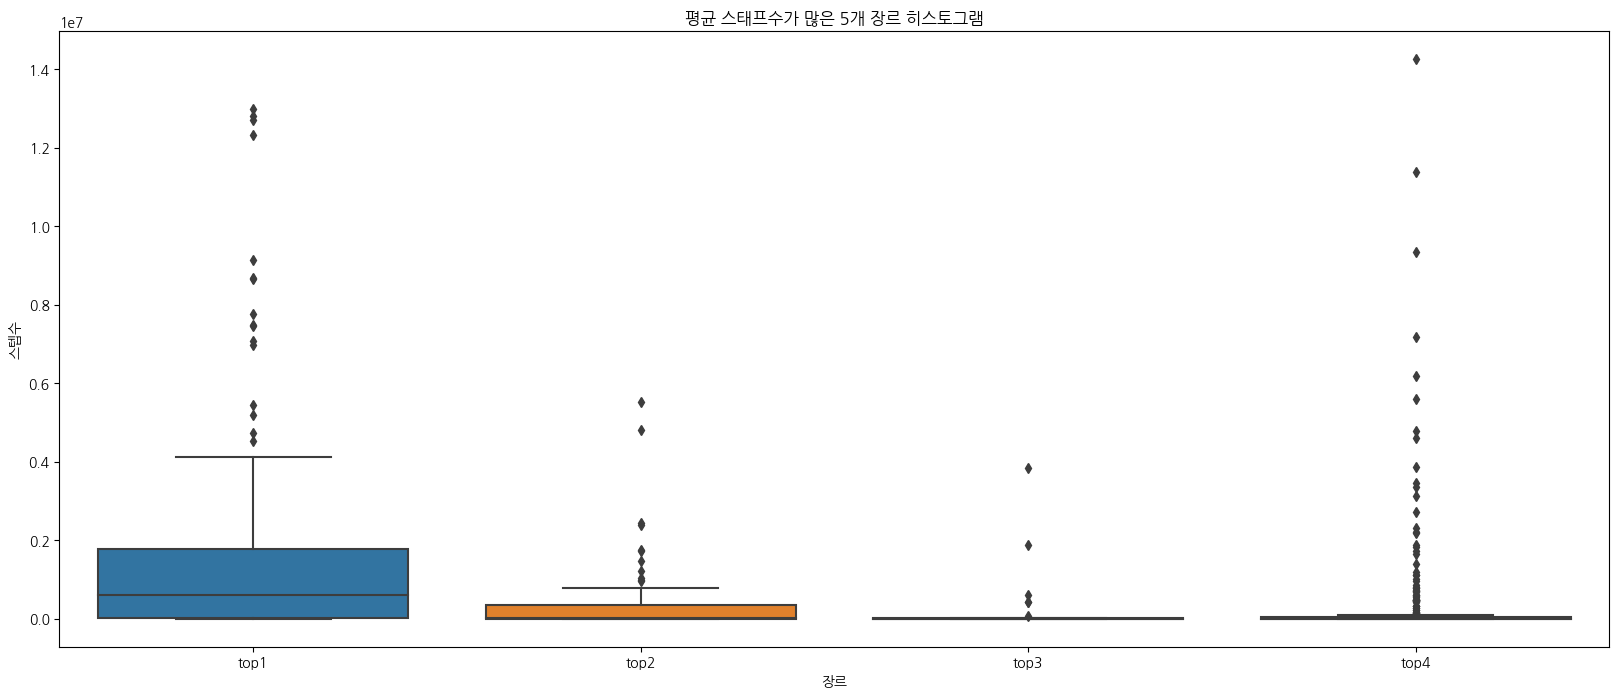

In [55]:
ax=plt.subplots()
ax=sns.boxplot(x='top_director',y='box_off_num',data=train, order=['top1','top2','top3','top4'])
ax.set_title('평균 스태프수가 많은 5개 장르 히스토그램')
ax.set_xlabel('장르')
ax.set_ylabel('스텝수')

**결과**
* 평균 관객수가 이전에 많은 감독일수록 현재 관객수가 많은 경향은 있지만 이상점들이 많이 존재하여 단정지을 수 없다.
* 이전 작품이 없는 감독들은 모두 top4그룹에 속해있어 일반화하기 어렵다.

>### b) 감독의 이전평균관객수와 현재관객수간 상관관계
* 영화감독이 관객수에 미치는 영향파악


In [56]:
df = train.groupby('director')['dir_prev_bfnum','dir_prev_num','box_off_num'].sum() 
df = df[df['dir_prev_num'] != 0]  
df

,dir_prev_bfnum,dir_prev_num,box_off_num
director,,,
강우석,844821.0,3,5094896
강형철,16061870.5,3,11469079
강효진,37518.0,1,1214237
경순,10393.5,2,2119
계윤식,1468191.0,1,101698
...,...,...,...
홍원찬,2888383.5,4,441208
홍지영,661220.5,2,1214839
황동혁,2781990.5,2,8659725


In [57]:
df.corr()

,dir_prev_bfnum,dir_prev_num,box_off_num
dir_prev_bfnum,1.0,0.3,0.4
dir_prev_num,0.3,1.0,0.4
box_off_num,0.4,0.4,1.0


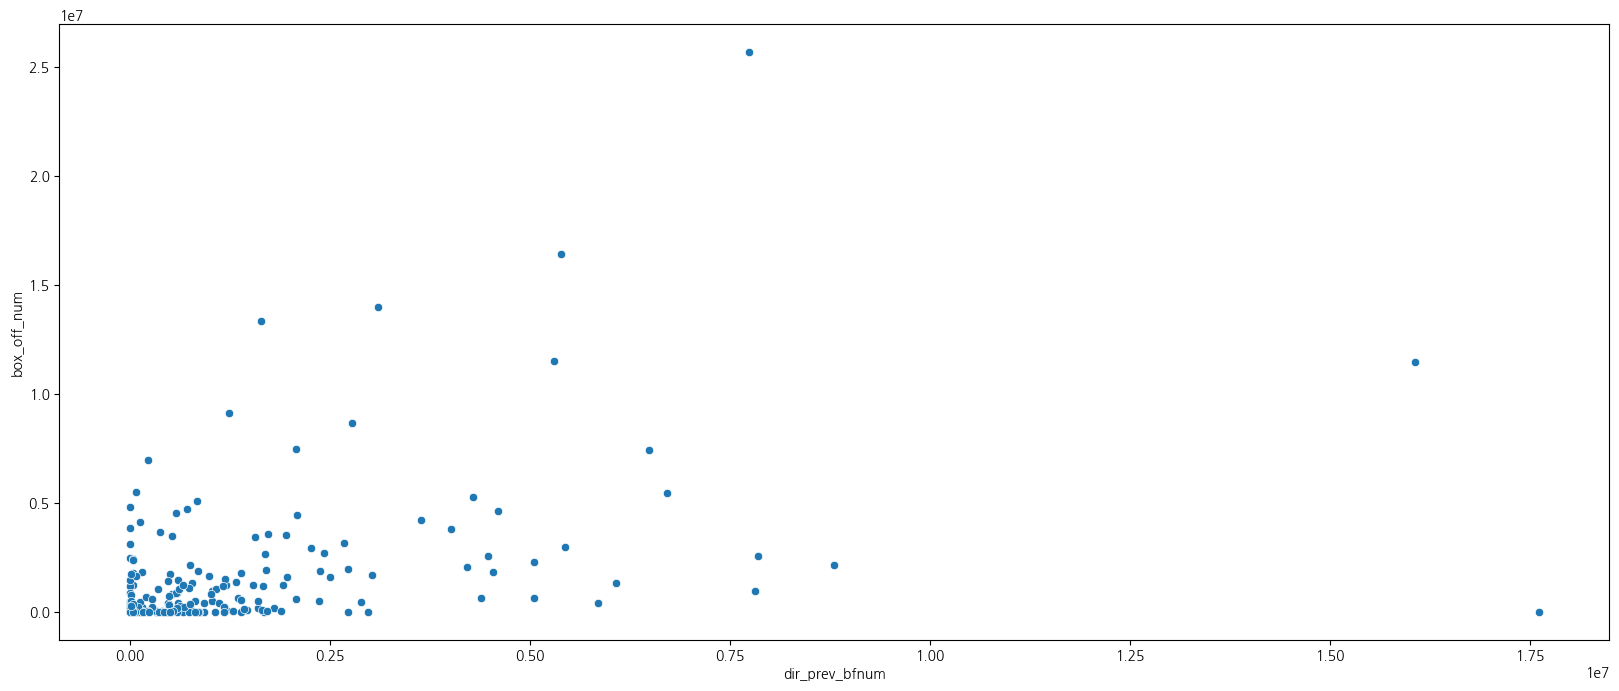

In [58]:
sns.scatterplot(x='dir_prev_bfnum',y='box_off_num',data=df)
plt.show()

**결과**
* 산점도를 그려봤을 때, 데이터 값의 상당수가 0에 가깝다.
* 감독의 이전 영화 관객 수와 현재 영화 관객 수 사이에 뚜렷한 상관관계가 있다고 보기 어렵다.

>### c) 감독의 이전 영화 성공률에 따른 영화의 스케일 차이(주연배우 수, 스텝수, 관객수)
* 감독의 이전 영화의 평균 관객수가 높으면 그 다음 영화 투자비율이 높을 것이다.

In [59]:
t_df=train[["dir_prev_bfnum","num_staff","num_actor","box_off_num"]]
t_df

,dir_prev_bfnum,num_staff,num_actor,box_off_num
0,0.0,91,2,23398
1,1161602.5,387,3,7072501
2,220775.2,343,4,6959083
3,23894.0,20,6,217866
4,1.0,251,2,483387
...,...,...,...,...
595,3833.0,510,7,1475091
596,496061.0,286,6,1716438
597,0.0,123,4,2475
598,0.0,431,4,2192525


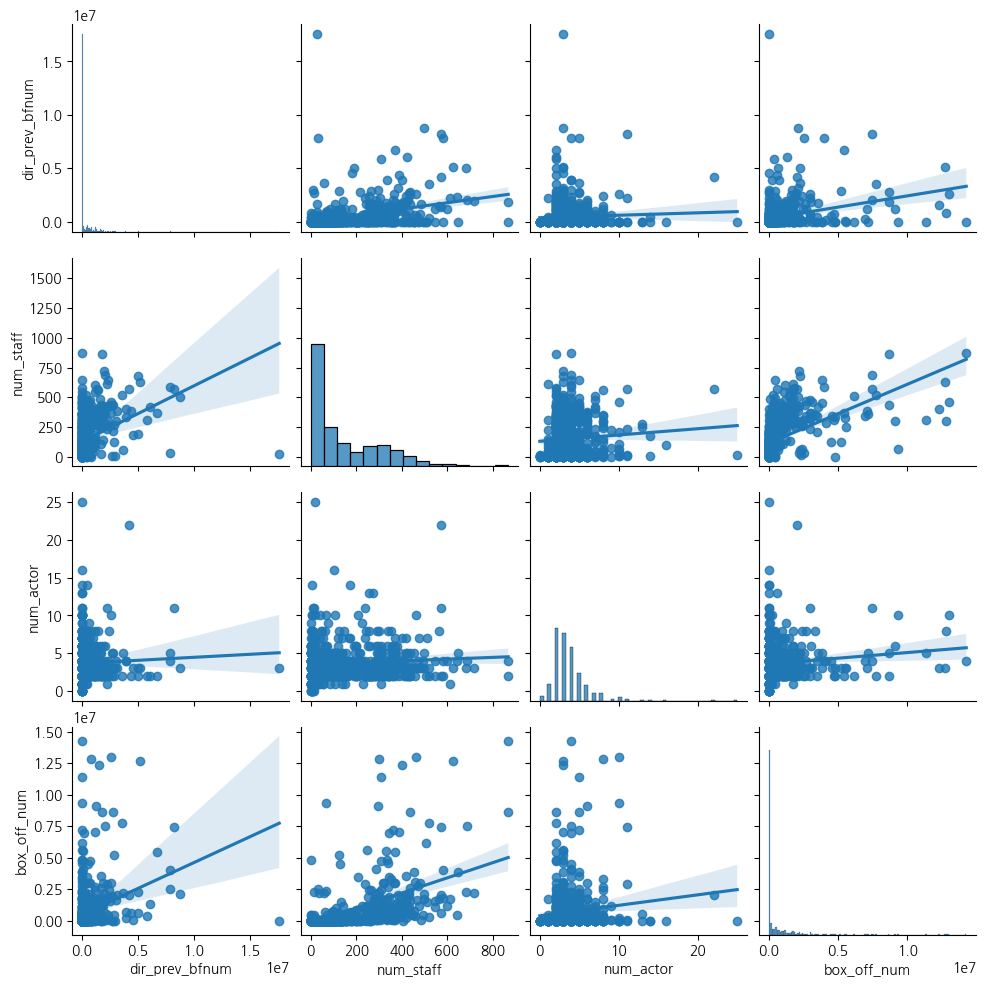

In [60]:
sns.pairplot(t_df,kind='reg')

# 주연 배우수를 제외하고 스태프수와 관객 수와 양의 상관관계를 띄는 것을 알 수 있다

##**3-4)상영등급**
>### a) 상영등급별 필요 인력수를 장르별로 확인하기

In [61]:
#전체 필요인력수는 people로 할당
train['people']=train['num_staff']+train['num_actor']
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_year,release_month,release_day,release_weekday,release_season,quart,top_director,people
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2012,11,22,3,autumn,4분기,top4,93
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015,11,19,3,autumn,4분기,top1,390
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,2013,6,5,2,summer,2분기,top1,347
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866,2012,7,12,3,summer,3분기,top2,26
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387,2010,11,4,3,autumn,4분기,top4,253


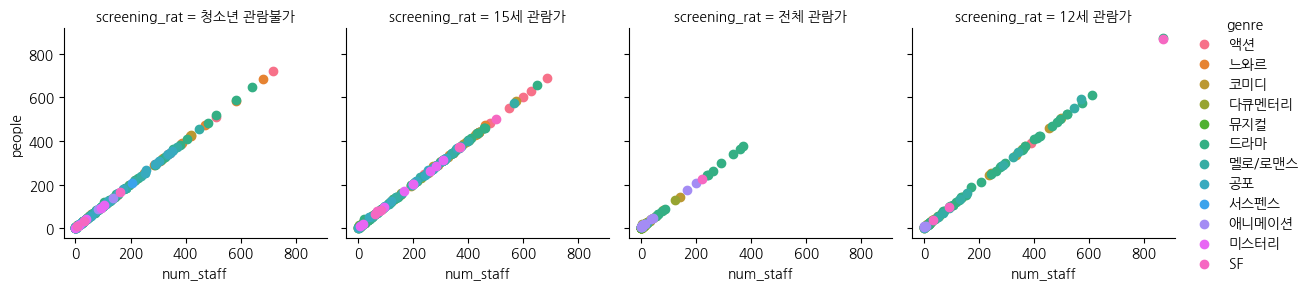

In [62]:
facet=sns.FacetGrid(train,col='screening_rat',hue='genre')
facet.map(plt.scatter,'num_staff','people')
facet=facet.add_legend()

**결과**
* 전체관람가인 영화일수록 다른 영화에 비해 인력이 적게 필요하였다.

>### b) 상영등급 별 관객수 분포 및 누적 관객수
* 가설: 12세 관람가 누적 관객수가 가장 많을 것이다.
* 사용되는 데이터: screening_rat, box_off_num
* 데이터 파악: 상영등급은 categorical, 관객수는 numeric
* boxplot: 관객 수 분포
* barplot: 누적 관객수 시각화

In [63]:
#상영등급이 어떻게 분류되어 있을까?
train['screening_rat'].value_counts() #총 4개의 범주로 이루어짐

청소년 관람불가    204
15세 관람가     202
12세 관람가     102
전체 관람가       92
Name: screening_rat, dtype: int64

Text(0, 0.5, '영화 수')

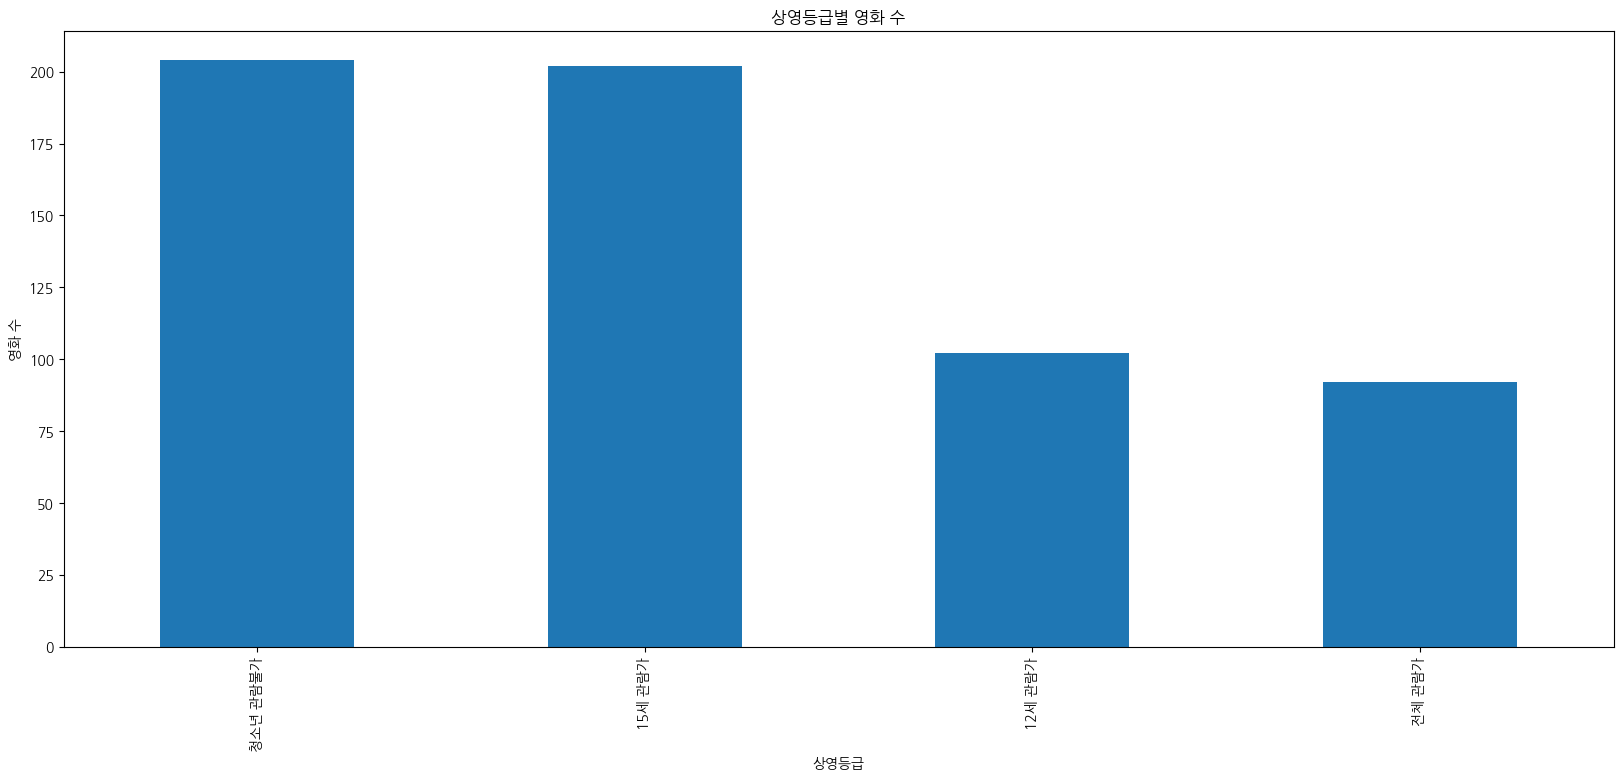

In [64]:
# 0. 상영등급별 관객수를 파악하기 전에, 상영등급별 영화 수를 살펴보자
train['screening_rat'].value_counts().plot(kind='bar')
plt.title('상영등급별 영화 수')
plt.xlabel('상영등급')
plt.ylabel('영화 수')

**결과**
* 청소년관람불가와 15세가 가장 많고, 12세 관람가, 전체관람가가 그 뒤를 따른다.

(0.0, 5000000.0)

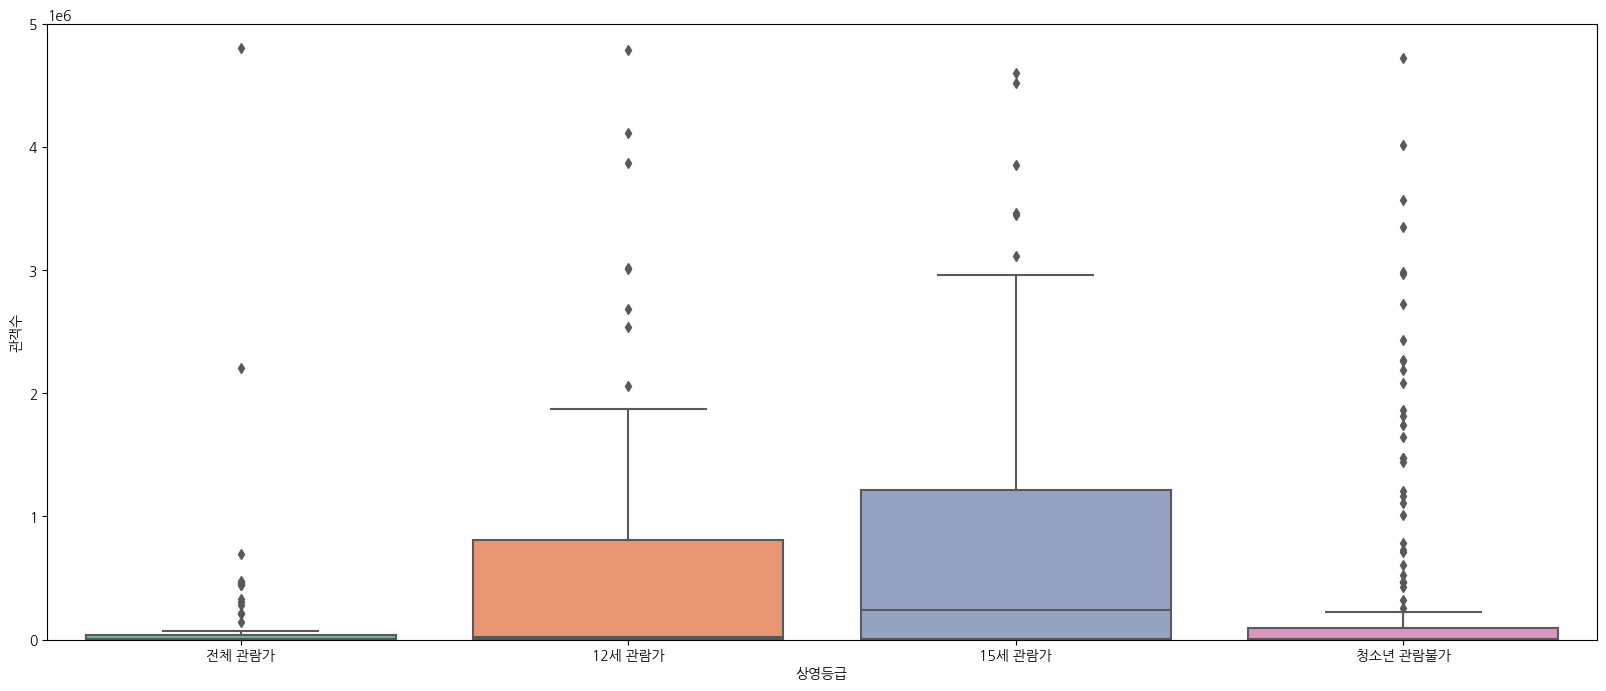

In [65]:
# 1. box plot 활용해 상영등급 별 관객수 분포를 알아보자
plt.subplots()
labels=['전체 관람가', '12세 관람가', '15세 관람가', '청소년 관람불가']
sns.boxplot(x='screening_rat', y='box_off_num', data=train, order=labels, palette='Set2')
plt.xlabel('상영등급')
plt.ylabel('관객수')
plt.ylim(0,5000000)

**결과**
* 15세 관람가의 평균 관객수가 가장 많아보인다.
* 청소년 관람불가 영화 중 Q3~Q4에 해당하는 영화의 분포가 다양하다.
* 청소년 관람불가 상영 영화수가 많지만, 평균 관객수는 많지 않아보인다.

In [66]:
# 2. 상영등급별 누적관객수를 bar graph 통해 시각화하자
total_rat=train.groupby('screening_rat')['box_off_num'].sum().sort_values(ascending=False)
total_rat

screening_rat
15세 관람가     251998766
12세 관람가      86188052
청소년 관람불가     74292991
전체 관람가       12429242
Name: box_off_num, dtype: int64

Text(0, 0.5, '누적 관객수')

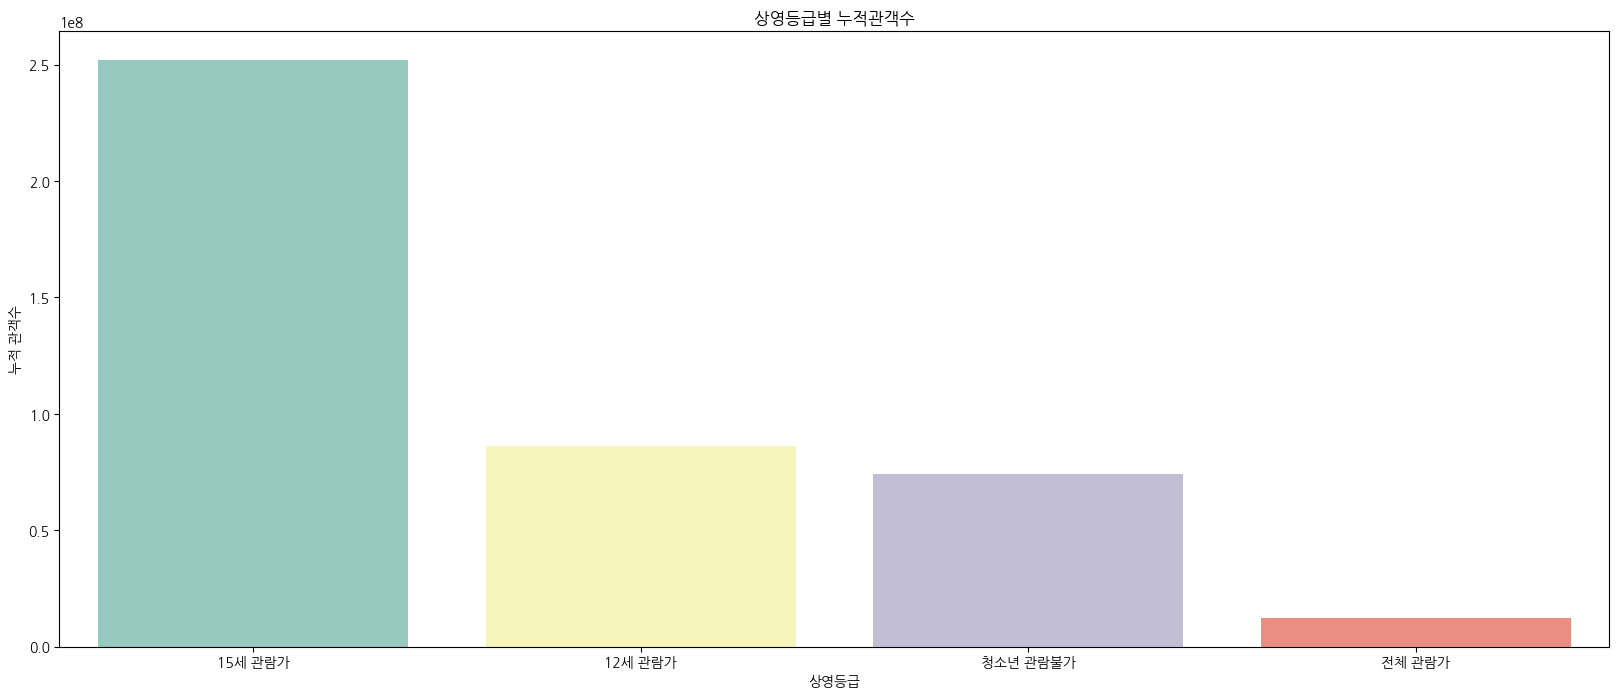

In [67]:
#상영등급별 누적관객수 bar graph 그리기
df=pd.DataFrame(total_rat)
df['screening_rat']= df.index
plt.subplots()
sns.barplot(x='screening_rat', y='box_off_num', data=df, palette='Set3')

plt.title('상영등급별 누적관객수')
plt.xlabel('상영등급')
plt.ylabel('누적 관객수')

**결과**
* 15세관람가>12세관람가>청소년관람불가>전체관람가 순으로 누적 관객수가 가장 많았다.
* 특히 15세 관람가는 다른 상영등급에 비해 2배 이상이다.
* 예상과는 다르게 15세 관람가 누적관객수가 가장 많다.


##**3-5)상영시간**
> ### a) 상영시간과 관객수간 상관관계
* 영화 상영시간이 너무 길거나 짧은 경우 영화의 선호도가 떨어지는지 확인. + 어느 상영 시간이 가장 선호도가 높은지 확인


In [68]:
df1 = train[['time','box_off_num']]
df1.corr()

,time,box_off_num
time,1.0,0.4
box_off_num,0.4,1.0


상영시간과 관객 수 간의 상관관계는 0.4 수준으로 낮은 편이다.

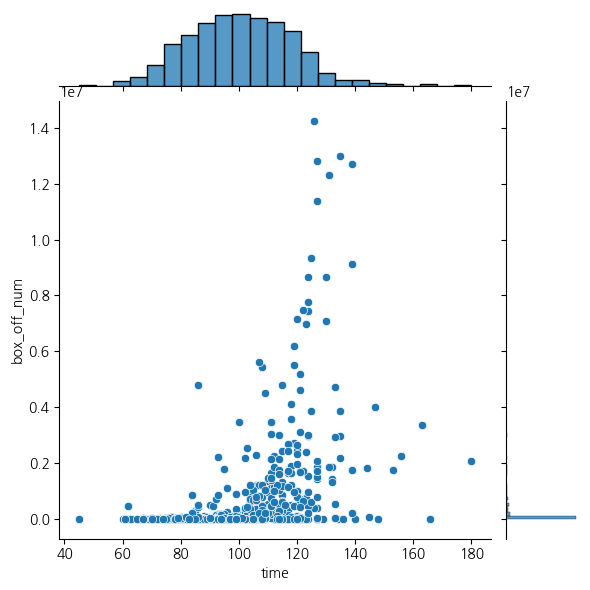

In [69]:
sns.jointplot(x='time',y='box_off_num',data=train)
plt.show()

**결과**
* 히스토그램을 통해 상영시간이 80~120분 사이일 경우 관객 수가 많다는 것을 확인할 수 있다.
* 산점도를 통해 대부분의 영화가 비슷한 관객 수를 갖지만, 특이한 값을 보이는 (유난히 높은 관객 수를 가진) 영화의 상영시간이 120분~140분 사이임을 알 수 있다.